In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Spotify_Youtube.csv')

In [3]:
df.head()
df.tail()
df.shape

(20718, 28)

In [4]:
df.info()
df.duplicated().sum()
df.isna().sum()
df=df.dropna()
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [5]:
del df['Speechiness']
del df['Acousticness']
del df['Liveness']
del df['Valence']
del df['Energy']
del df['Unnamed: 0']

In [6]:
for i in df:
  if df[i].dtypes=="object":
    print(df[i].value_counts())
    print('******************')
    print()

Artist
Gorillaz                   10
Five Finger Death Punch    10
Hamza                      10
Sean Kingston              10
Fabrizio Paterlini         10
                           ..
The Cure                    1
Zion & Lennox               1
Pink Floyd                  1
Simone & Simaria            1
Hugo & Guilherme            1
Name: count, Length: 2040, dtype: int64
******************

Url_spotify
https://open.spotify.com/artist/3AA28KZvwAUcZuOKwyblJQ    10
https://open.spotify.com/artist/5t28BP42x2axFnqOOMg3CM    10
https://open.spotify.com/artist/5gs4Sm2WQUkcGeikMcVHbh    10
https://open.spotify.com/artist/6S0dmVVn4udvppDhZIWxCr    10
https://open.spotify.com/artist/0jrFMgW018F1XVnLtCXOKi    10
                                                          ..
https://open.spotify.com/artist/7bu3H8JO7d0UbMoVzbo70s     1
https://open.spotify.com/artist/21451j1KhjAiaYKflxBjr1     1
https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9     1
https://open.spotify.com/artist/0MInKJqZsc

univariate analysis


In [7]:
for col in df:
  if df[col].dtype=="int" or df[col].dtype=="float":
    print(col)
    print('')
    print(f"Mean: {df[col].mean()}")
    print(f"median: {df[col].median()}")
    print(f"sd: {df[col].std()}")
    print(f"variance: {df[col].var()}")
    print(f"minimum: {df[col].min()}")
    print(f"maximum: {df[col].max()}")
    print(f"count: {df[col].count()}")
    print('___________________________')

Danceability

Mean: 0.6211780386019822
median: 0.639
sd: 0.165532544354122
variance: 0.027401023240349376
minimum: 0.0
maximum: 0.975
count: 19170
___________________________
Key

Mean: 5.292644757433489
median: 5.0
sd: 3.579946748696263
variance: 12.816018723500942
minimum: 0.0
maximum: 11.0
count: 19170
___________________________
Loudness

Mean: -7.615304903495044
median: -6.504
sd: 4.617604984924424
variance: 21.322275796798888
minimum: -46.251
maximum: 0.92
count: 19170
___________________________
Instrumentalness

Mean: 0.05547561533750653
median: 2.37e-06
sd: 0.19276833636451002
variance: 0.03715963150474088
minimum: 0.0
maximum: 1.0
count: 19170
___________________________
Tempo

Mean: 120.60734486176317
median: 119.969
sd: 29.588307791497268
variance: 875.467957964378
minimum: 0.0
maximum: 243.372
count: 19170
___________________________
Duration_ms

Mean: 224761.20213875847
median: 213321.0
sd: 127846.79573749489
variance: 16344803180.34474
minimum: 30985.0
maximum: 4676058.0

outlier


In [8]:
q1=df['Views'].quantile(0.25)
q3=df['Views'].quantile(0.75)
iqr=q3-q1
min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
min_range #-105360064
max_range #181120674

181120674.875

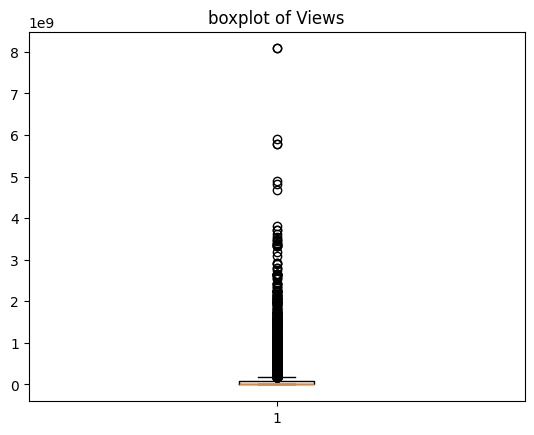

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(df['Views'])
plt.title('boxplot of Views')
plt.show()

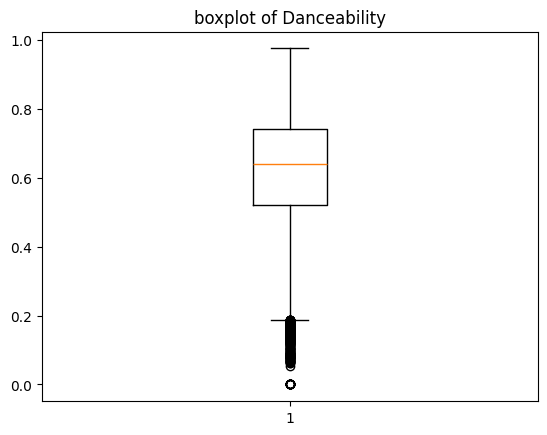

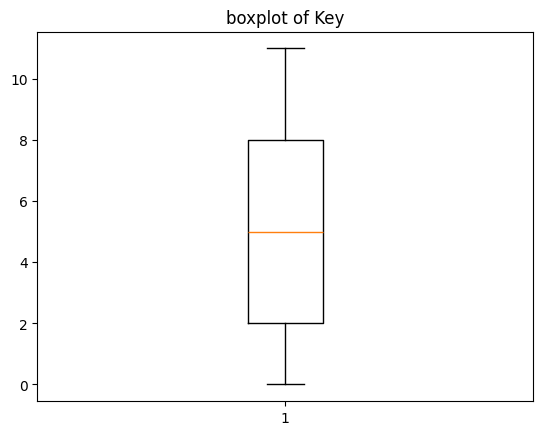

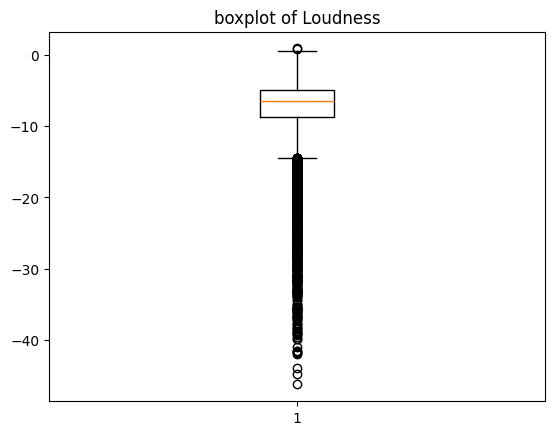

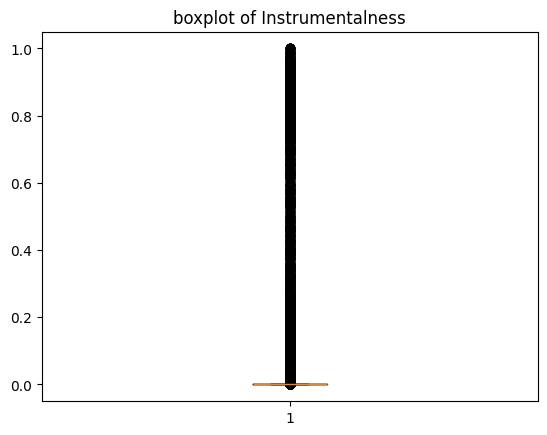

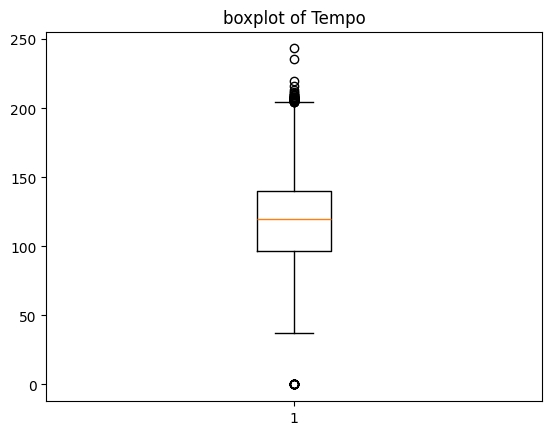

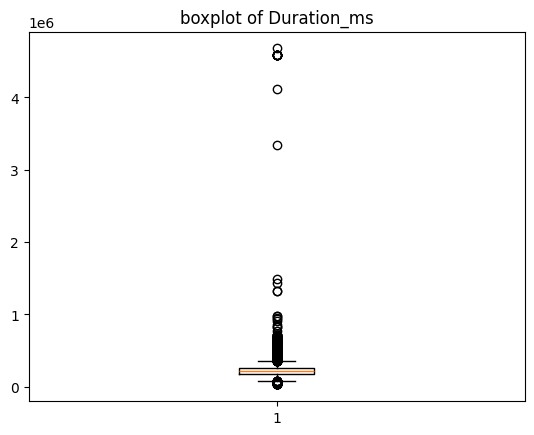

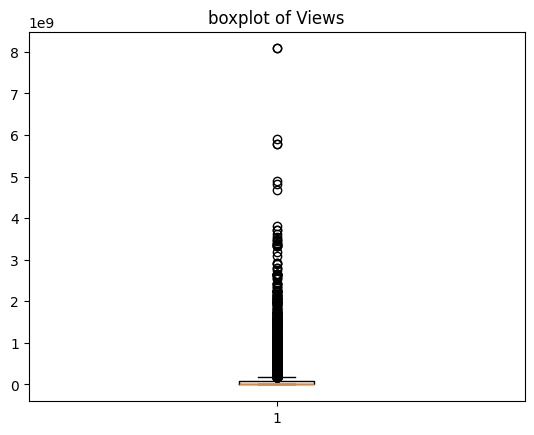

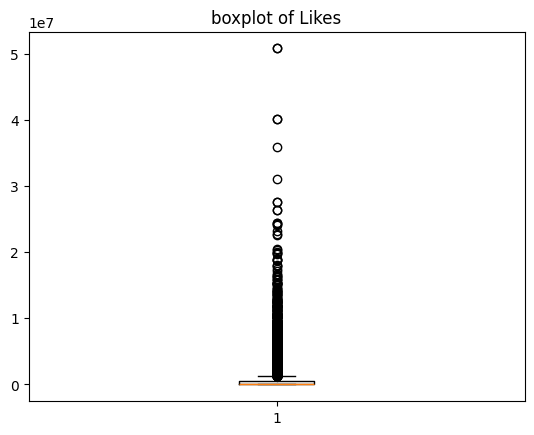

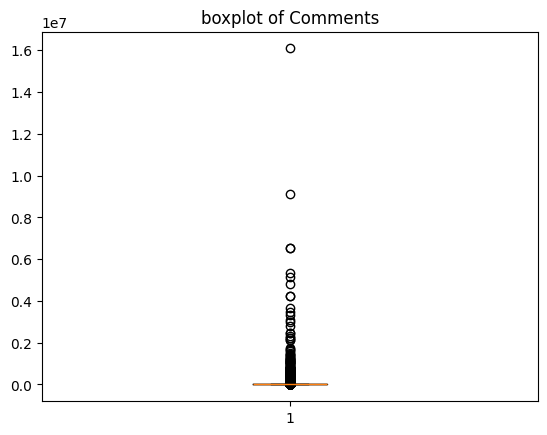

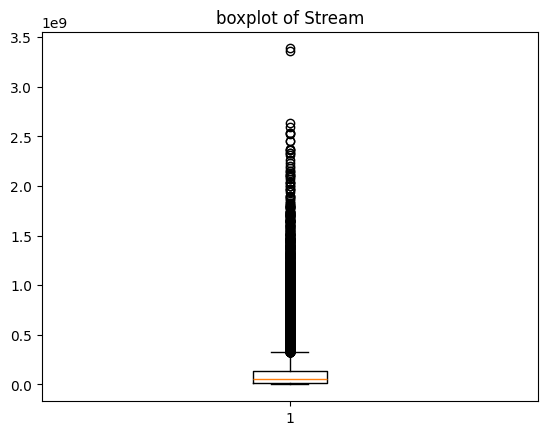

In [10]:
for col in df:
  if df[col].dtype=='int' or df[col].dtype=='float':
    plt.boxplot(df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

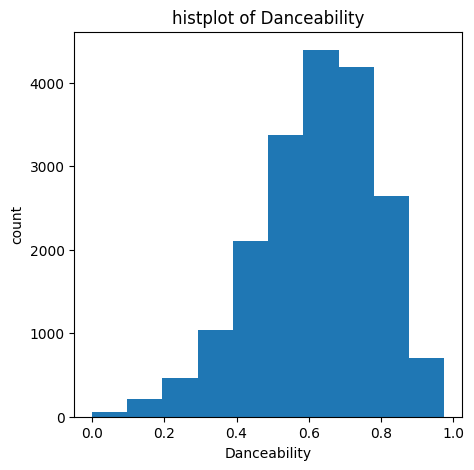

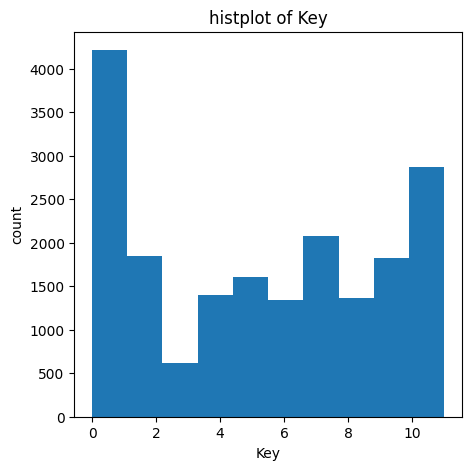

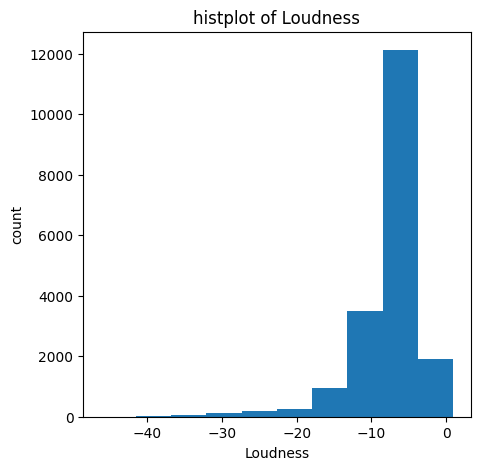

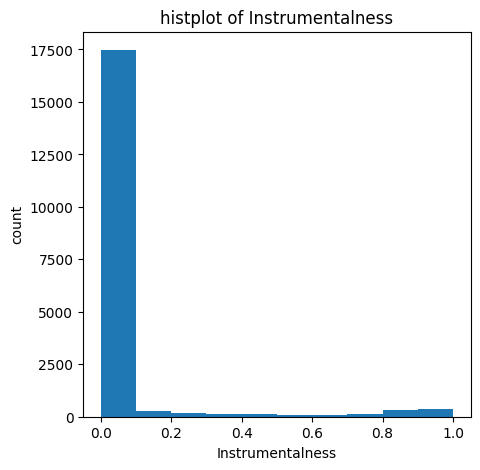

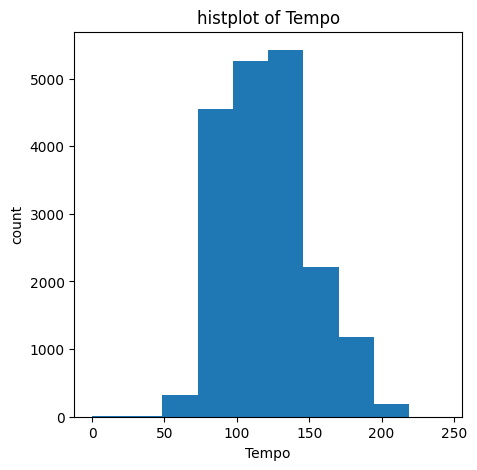

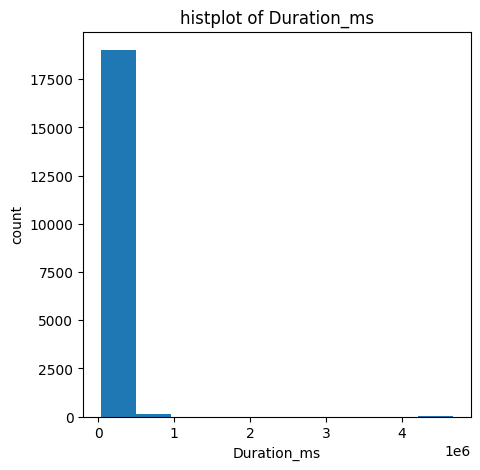

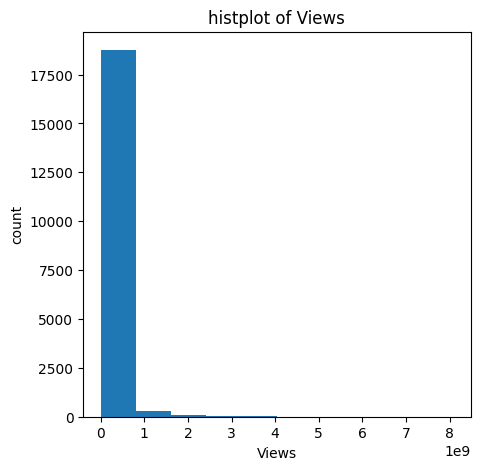

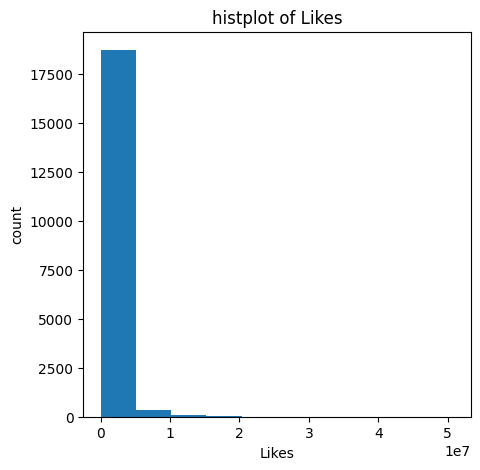

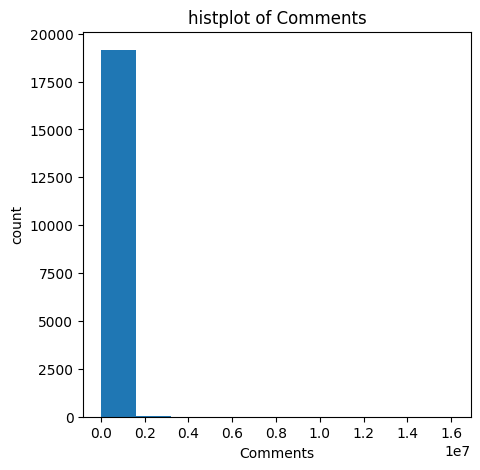

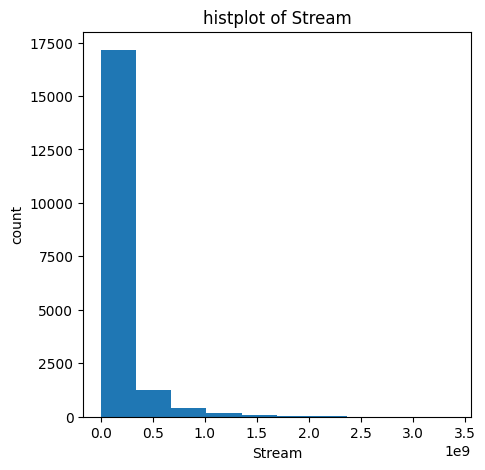

In [11]:
for i in df:
  if df[i].dtype=='int' or df[i].dtype=='float':
    plt.figure(figsize=(5,5))
    plt.hist(df[i],bins=10)
    plt.title(f'histplot of {i}')
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

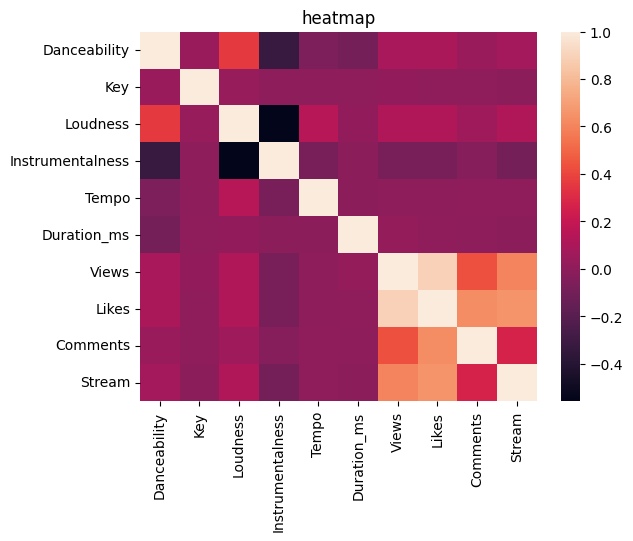

In [12]:
import seaborn as sns
var1=df.corr(numeric_only=True)
plt.title('heatmap')
sns.heatmap(var1)
plt.show()

In [13]:
# var1=df[['Likes','Views']].groupby('Likes').mean()
# plt.plot(var1.index,var1)
# plt.title('Likes vs Views')
# plt.xlabel('Likes')
# plt.ylabel('Views')
# plt.show()

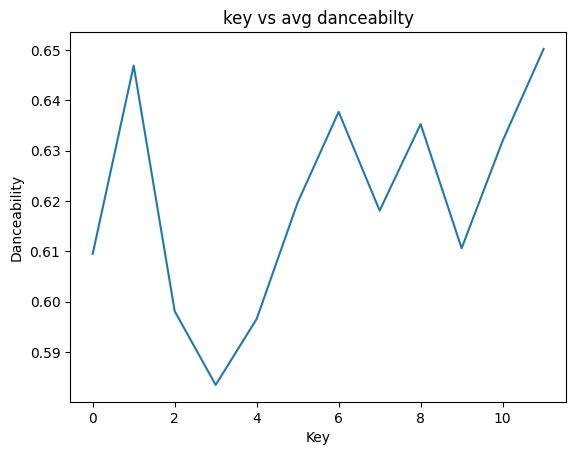

In [14]:
var1=df[['Key','Danceability']].groupby('Key').mean()
plt.plot(var1.index,var1)
plt.title('key vs avg danceabilty')
plt.xlabel('Key')
plt.ylabel('Danceability')
plt.show()

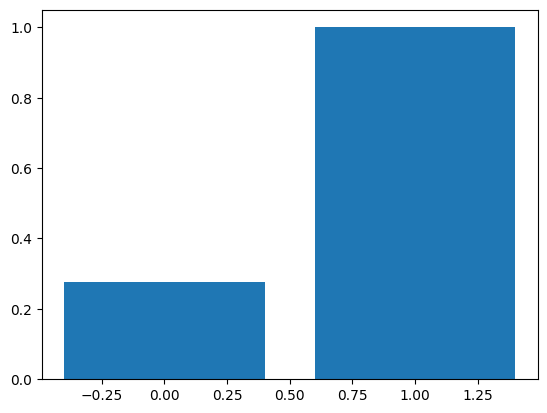

In [15]:
plt.bar(x=df.groupby('Licensed')['official_video'].mean().index,height=df.groupby('Licensed')['official_video'].mean())
plt.show()

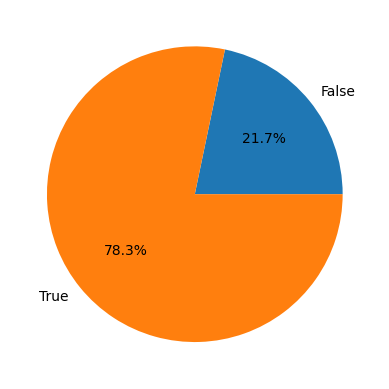

In [16]:

plt.pie(df.groupby('Licensed')['official_video'].mean(),labels=df.groupby('Licensed')['official_video'].mean().index,autopct='%1.1f%%')
plt.show()

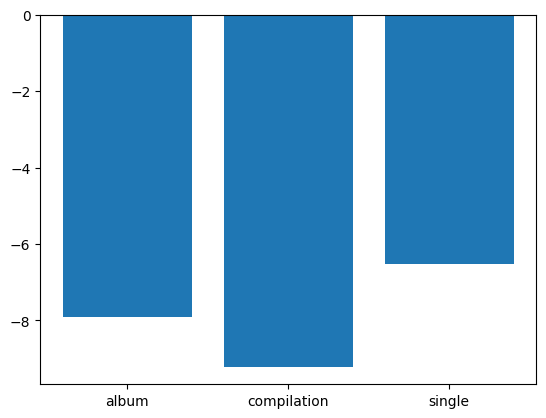

In [17]:
plt.bar(x=df.groupby('Album_type')['Loudness'].mean().index,height=df.groupby('Album_type')['Loudness'].mean())
plt.show()

In [18]:
#violine plot
# data = {'danceability': [0.8, 0.9, 0.7, 0.85, 0.65, 0.95],
#         'albumtype': ['Single', 'Album', 'Single', 'Album', 'Single', 'Album']}
# df = pd.DataFrame(data)
# #Violin plot for danceability by album type
# sns.violinplot(x='albumtype', y='danceability', data=df)
# plt.title('Danceability by Album Type')
# plt.show()



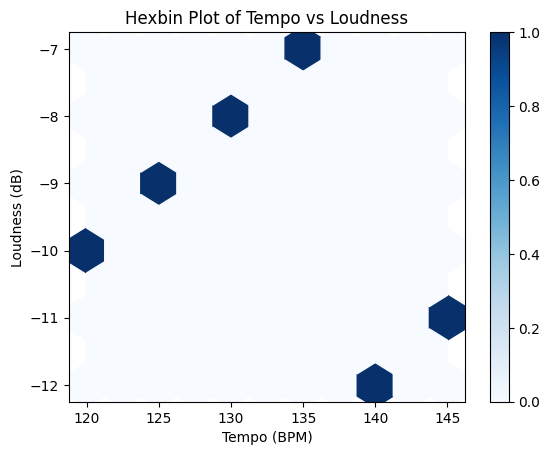

In [19]:
#hexbin plot
df = pd.DataFrame({'tempo': [120, 130, 140, 125, 135, 145],
                   'loudness': [-10, -8, -12, -9, -7, -11]})
df.plot.hexbin(x='tempo', y='loudness', gridsize=10, cmap='Blues', title='Hexbin Plot of Tempo vs Loudness')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Loudness (dB)')
plt.show()

In [20]:
#pair plot
# sns.pairplot(df)
# plt.suptitle('Pair Plot', y=1.02)
# plt.show()



In [21]:
#Rug plot for tempo
# sns.rugplot(df['tempo'], height=0.2, color='darkblue')
# plt.title('Rug Plot of Tempo')
# plt.xlabel('Tempo (BPM)')
# plt.show()



In [22]:
# joint plot
# sns.jointplot(x='tempo', y='loudness', data=df, kind='kde', cmap='coolwarm')
# plt.suptitle('Joint Plot of Tempo vs Loudness', y=1.02)
# plt.show()


In [23]:

from pandas.plotting import andrews_curves


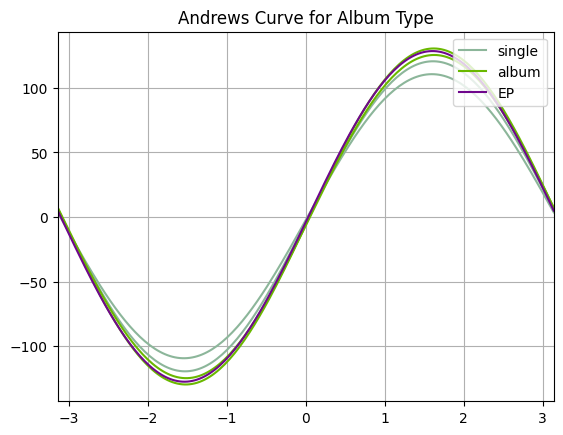

In [24]:
# # # Example dataset
data = {
    "Artist": ["Artist1", "Artist2", "Artist3", "Artist4", "Artist5"],
    "album type": ["single", "album", "single", "album", "EP"],
    "danceability": [0.8, 0.6, 0.9, 0.5, 0.7],
    "tempo": [120, 130, 110, 125, 128],
    "loudness": [-5.0, -6.5, -3.0, -7.0, -4.5],
    "views": [100000, 200000, 150000, 250000, 80000]
}
df = pd.DataFrame(data)

#Ensure only numerical columns are used along with the categorical grouping column
columns_to_plot = ['danceability', 'tempo', 'loudness', 'album type']
df_subset = df[columns_to_plot]
andrews_curves(df_subset, 'album type')
plt.title("Andrews Curve for Album Type")
plt.show()

In [25]:
df

,Artist,album type,danceability,tempo,loudness,views
0,Artist1,single,0.8,120,-5.0,100000
1,Artist2,album,0.6,130,-6.5,200000
2,Artist3,single,0.9,110,-3.0,150000
3,Artist4,album,0.5,125,-7.0,250000
4,Artist5,EP,0.7,128,-4.5,80000
